In [2]:
# --------------------------------------------------
# Import required libraries and set global display
# and visualization settings for the notebook
# --------------------------------------------------
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")


In [4]:
# --------------------------------------------------
# Load the student performance dataset and preview
# the first few rows to verify successful import
# --------------------------------------------------
df = pd.read_csv("../data/raw/student-mat.csv",sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
# --------------------------------------------------
# Inspect dataset dimensions, column names,
# and data types to understand the structure
# --------------------------------------------------

# Rows and columns
df.shape

# Column names
df.columns

# Data types & nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
# --------------------------------------------------
# Generate summary statistics for numerical
# and categorical features
# --------------------------------------------------

df.describe()

df.describe(include="object")

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [ ]:
# --------------------------------------------------
# Create the target variable indicating whether
# a student passed based on the final grade
# --------------------------------------------------

# Create target variable
df["pass"] = (df["G3"] >= 10).astype(int)
# Check distribution
df["pass"].value_counts()


pass
1    265
0    130
Name: count, dtype: int64

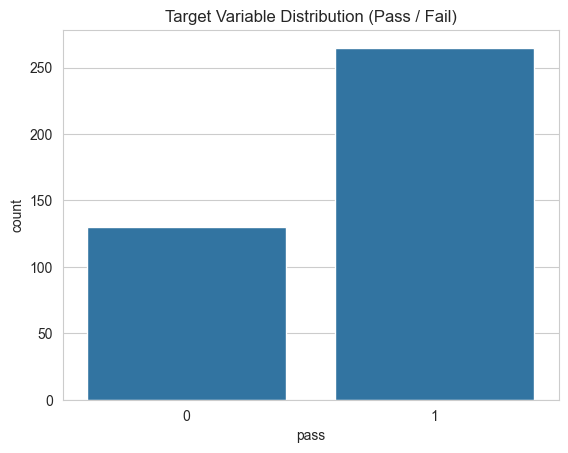

In [8]:
# --------------------------------------------------
# Visualize the distribution of the target variable
# to check for class imbalance
# --------------------------------------------------
sns.countplot(x="pass", data=df)
plt.title("Target Variable Distribution (Pass / Fail)")
plt.show()


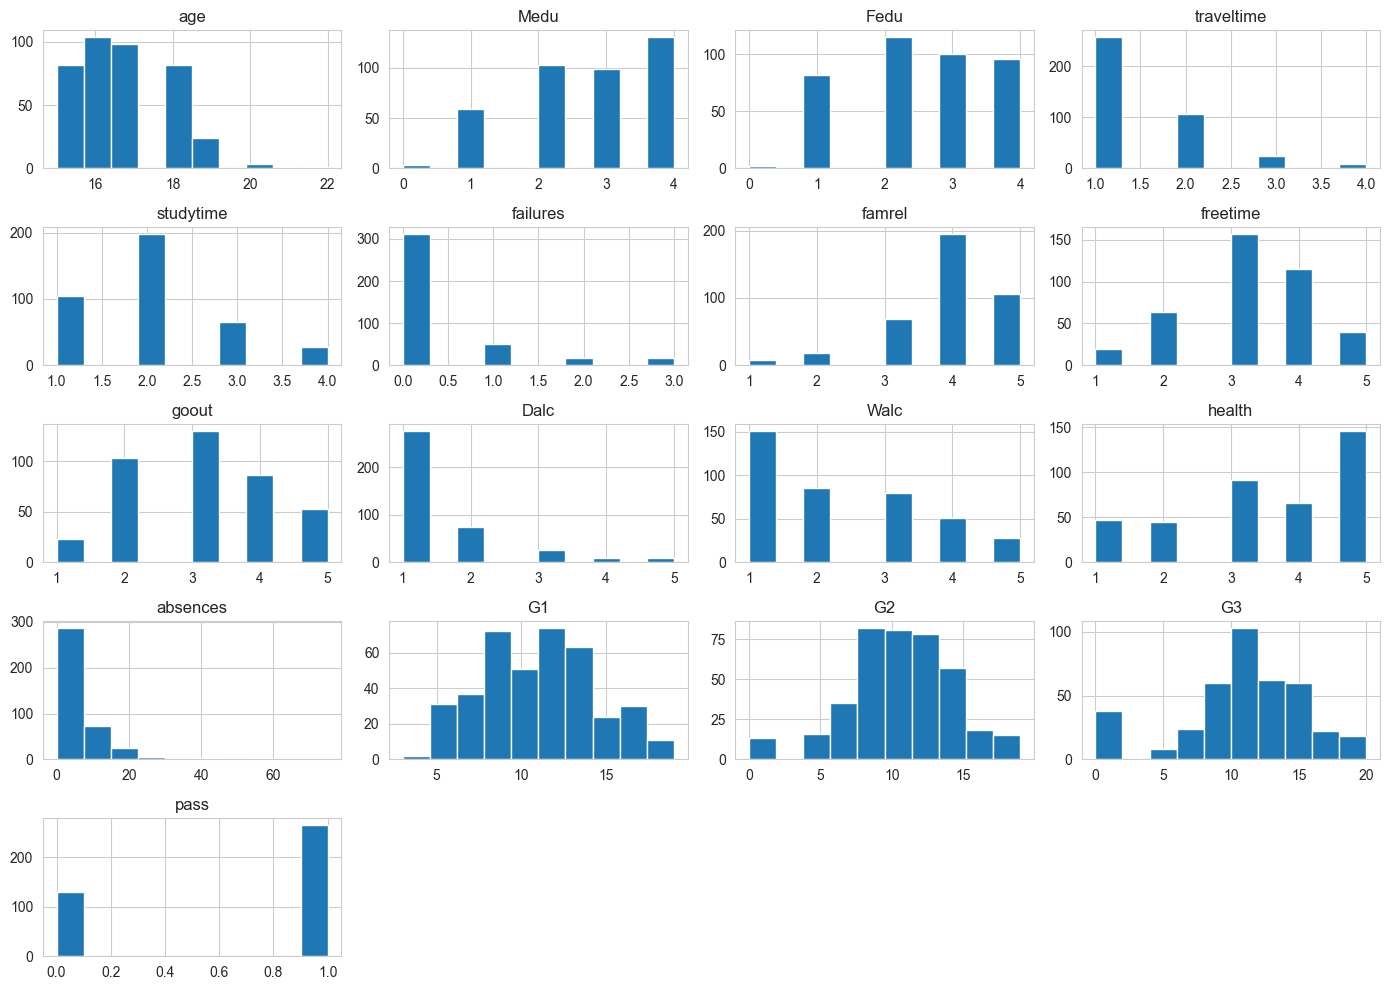

In [ ]:
# --------------------------------------------------
# Identify numerical features and visualize their
# distributions to understand data spread and skew
# --------------------------------------------------

# Select numerical columns from the dataset
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
numerical_features

# Plot histograms for all numerical features
df[numerical_features].hist(figsize=(14, 10))
plt.tight_layout()
plt.show()

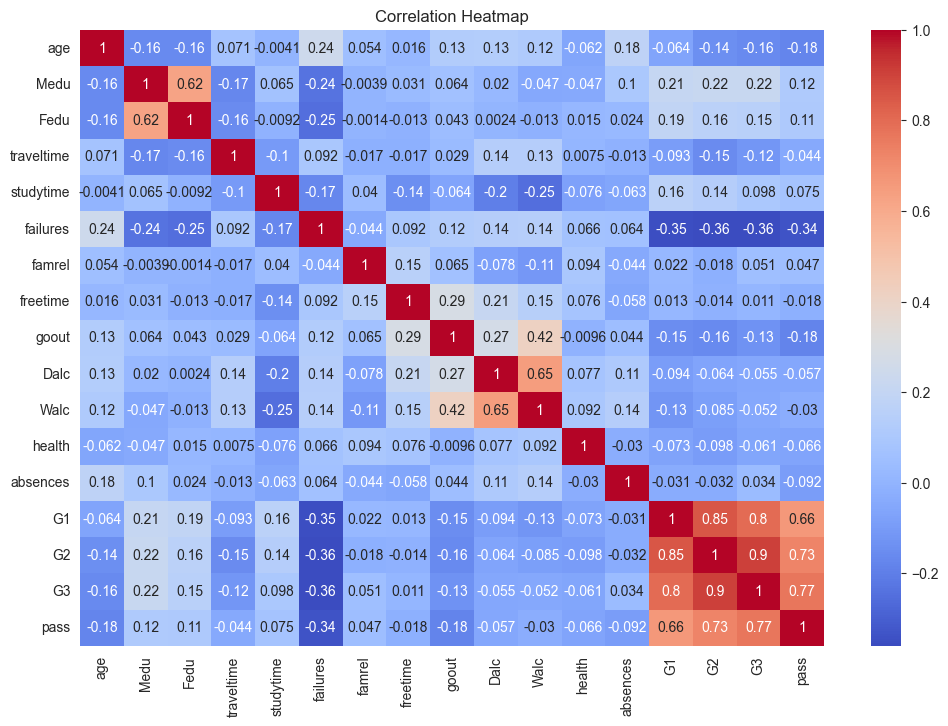

In [11]:
# --------------------------------------------------
# Visualize correlations between numerical features
# using a heatmap to identify potential relationships
# --------------------------------------------------
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


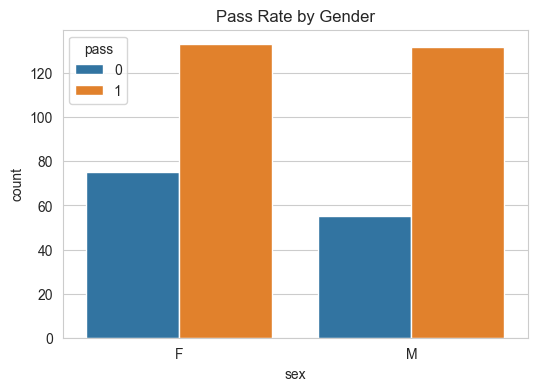

In [12]:
# --------------------------------------------------
# Identify categorical features and visualize how
# the target variable ('pass') varies by gender
# --------------------------------------------------

# Select categorical columns from the dataset
categorical_features = df.select_dtypes(include="object").columns
categorical_features

# Countplot showing pass/fail distribution by gender
plt.figure(figsize=(6, 4))
sns.countplot(x="sex", hue="pass", data=df)
plt.title("Pass Rate by Gender")
plt.show()


In [13]:
# --------------------------------------------------
# Check for missing values in each column to ensure
# data completeness before analysis or modeling
# --------------------------------------------------
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
pass          0
dtype: int64

In [14]:
# --------------------------------------------------
# Save the cleaned and processed dataset to the
# processed data directory for future use
# --------------------------------------------------

df.to_csv("../data/processed/processed_student_data.csv", index=False)
